# Creating Financial Ratios and Plots

## Assisting the Hedge Fund Manager

2 datasets: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. 
Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

## Importing required libraries

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns

## Reading the 2 datasets

In [99]:
bal = pd.read_excel('data/Balance_Sheet.xlsx')
income = pd.read_excel('data/Income_Statement.xlsx')

### Viewing the initial rows of both datasets

In [ ]:
bal.head()

In [100]:
income.head()

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


## Merging both datasets on common features

In [101]:
combined = pd.merge(bal,income,on=['Year','comp_type','company'])
combined.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000


## Calculating the required Ratio

### Leveraged Ratio

In [102]:
df_ratios = pd.DataFrame()
df_ratios['leverage_ratio'] = combined['Total Assets'] / combined['Total Stockholder Equity']

### Profitability Ratio

In [103]:
df_ratios['profitability_ratio'] = combined['Gross Profit'] / combined['Total Revenue']

## Finding the company type with lowest pofitability

In [104]:
combined['profitability_ratio'] = combined['Gross Profit'] / combined['Total Revenue']
df = combined.pivot_table(index = 'comp_type',values = 'profitability_ratio').sort_values(by='profitability_ratio',ascending=True)
lowest_profitability = df['profitability_ratio'].reset_index().iloc[0][0]

In [105]:
lowest_profitability

'fmcg'

## Finding the company with the highest profitability

In [106]:
combined['leveraged_ratio'] = combined['Total Assets'] / combined['Total Stockholder Equity']
df2 = combined.pivot_table(index ='comp_type',values = 'leveraged_ratio').sort_values(by='leveraged_ratio',ascending=False)
highest_leverage = df2['leveraged_ratio'].reset_index().iloc[0][0]

In [107]:
highest_leverage

'real_est'

## Creating a scatter plot to understand relationship between leveraged ratio and profitability ratio

<AxesSubplot: xlabel='leveraged_ratio', ylabel='profitability_ratio'>

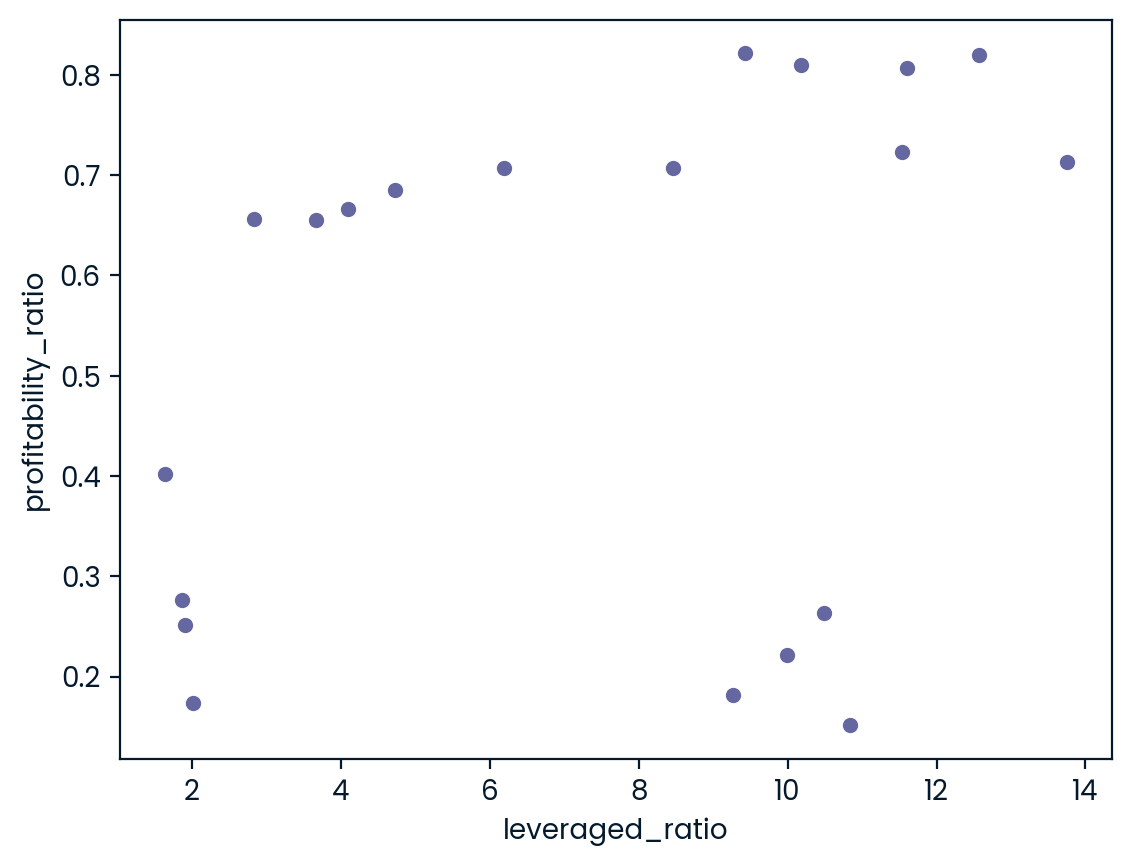

In [108]:
df_real_est = combined[combined['comp_type'] == 'real_est']
sns.scatterplot(x=df_real_est['leveraged_ratio'],y=df_real_est['profitability_ratio'])

In [109]:
relationship = 'positive'